In [16]:
import pandas as pd
import numpy as np
import utils
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import CSVLogger


# Load the data
data = pd.read_csv('DSL-StrongPasswordData.csv')


# Assuming your DataFrame is named df
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject          20400 non-null  int64  
 1   sessionIndex     20400 non-null  int64  
 2   rep              20400 non-null  int64  
 3   H.period         20400 non-null  float64
 4   DD.period.t      20400 non-null  float64
 5   UD.period.t      20400 non-null  float64
 6   H.t              20400 non-null  float64
 7   DD.t.i           20400 non-null  float64
 8   UD.t.i           20400 non-null  float64
 9   H.i              20400 non-null  float64
 10  DD.i.e           20400 non-null  float64
 11  UD.i.e           20400 non-null  float64
 12  H.e              20400 non-null  float64
 13  DD.e.five        20400 non-null  float64
 14  UD.e.five        20400 non-null  float64
 15  H.five           20400 non-null  float64
 16  DD.five.Shift.r  20400 non-null  float64
 17  UD.five.Shif

In [17]:
# Extract features and labels
X = data.drop(columns=['subject', 'sessionIndex', 'rep'])

In [18]:
data['subject'] = data['subject'].astype('category')

In [19]:
# Convert categories to numerical labels
data['subject_encoded'] = data['subject'].cat.codes

In [20]:
from tensorflow.keras.utils import to_categorical
# Assuming the encoded column is the target for training
y = data['subject_encoded'].values

# Convert to one-hot encoded format
y_one_hot = to_categorical(y)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   subject          20400 non-null  category
 1   sessionIndex     20400 non-null  int64   
 2   rep              20400 non-null  int64   
 3   H.period         20400 non-null  float64 
 4   DD.period.t      20400 non-null  float64 
 5   UD.period.t      20400 non-null  float64 
 6   H.t              20400 non-null  float64 
 7   DD.t.i           20400 non-null  float64 
 8   UD.t.i           20400 non-null  float64 
 9   H.i              20400 non-null  float64 
 10  DD.i.e           20400 non-null  float64 
 11  UD.i.e           20400 non-null  float64 
 12  H.e              20400 non-null  float64 
 13  DD.e.five        20400 non-null  float64 
 14  UD.e.five        20400 non-null  float64 
 15  H.five           20400 non-null  float64 
 16  DD.five.Shift.r  20400 non-null  float64

In [22]:
# Split the data into training and testing sets with stratification
X_train, X_test, Y_train, Y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=1, stratify=y)

# Standardize the features (important for neural network training)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Neural Network model
def nn_model(input_dim, output_dim, nodes=40, dropout_rate=None):
    model = Sequential()
    model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
    if dropout_rate: 
        model.add(Dropout(dropout_rate))
    model.add(Dense(nodes, activation='relu'))
    if dropout_rate: 
        model.add(Dropout(dropout_rate))
    model.add(Dense(output_dim, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define the number of nodes in hidden layers and dropout rate (you can adjust these values)
nodes = 100
dropout_rate = 0.2

# Initialize the neural network with the correct input and output dimensions
model = nn_model(input_dim=X_train_scaled.shape[1], output_dim=y_one_hot.shape[1], nodes=nodes, dropout_rate=dropout_rate)

# Define a logger to save training metrics to a file
csv_logger = CSVLogger(f'models/training_total_{nodes}.log')

# Train the model
model.fit(X_train_scaled, Y_train, epochs=200, batch_size=5, validation_data=(X_test_scaled, Y_test), callbacks=[csv_logger])

Epoch 1/200


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3264/3264 ━━━━━━━━━━━━━━━━━━━━ 4s 982us/step - accuracy: 0.4266 - loss: 2.2133 - val_accuracy: 0.8169 - val_loss: 0.6833
Epoch 2/200
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 3s 811us/step - accuracy: 0.7505 - loss: 0.8744 - val_accuracy: 0.8547 - val_loss: 0.5185
Epoch 3/200
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 3s 964us/step - accuracy: 0.7939 - loss: 0.7095 - val_accuracy: 0.8716 - val_loss: 0.4483
Epoch 4/200
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 3s 986us/step - accuracy: 0.8136 - loss: 0.6222 - val_accuracy: 0.8819 - val_loss: 0.4096
Epoch 5/200
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 3s 905us/step - accuracy: 0.8329 - loss: 0.5593 - val_accuracy: 0.8939 - val_loss: 0.3785
Epoch 6/200
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 3s 835us/step - accuracy: 0.8467 - loss: 0.4959 - val_accuracy: 0.8958 - val_loss: 0.3573
Epoch 7/200
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 3s 938us/step - accuracy: 0.8546 - loss: 0.4745 - val_accuracy: 0.9015 - val_loss: 0.3235
Epoch 8/200
3264/3264 ━━━━━━━━━━━━━━━━━━━━ 3s 920us/step - accuracy: 0.8647 - los

In [23]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9079 - loss: 0.3922
Test Loss: 0.3474
Test Accuracy: 0.9127


In [24]:
from sklearn.metrics import classification_report

# Predict the labels on the test set
Y_pred = model.predict(X_test_scaled)
Y_pred_classes = Y_pred.argmax(axis=1)
Y_true_classes = Y_test.argmax(axis=1)

# Generate a classification report
report = classification_report(Y_true_classes, Y_pred_classes)
print(f"Classification Report:\n{report}")


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        80
           1       0.83      0.97      0.90        80
           2       0.89      0.85      0.87        80
           3       0.92      0.91      0.92        80
           4       0.85      0.85      0.85        80
           5       0.86      0.88      0.87        80
           6       0.95      0.94      0.94        80
           7       0.97      0.89      0.93        80
           8       0.90      0.88      0.89        80
           9       0.96      0.93      0.94        80
          10       0.90      0.89      0.89        80
          11       0.91      0.97      0.94        80
          12       0.95      0.97      0.96        80
          13       0.92      0.86      0.89        80
          14       0.97      0.96      0.97        80
          15       0.80      0.93      0.86        80
          16   

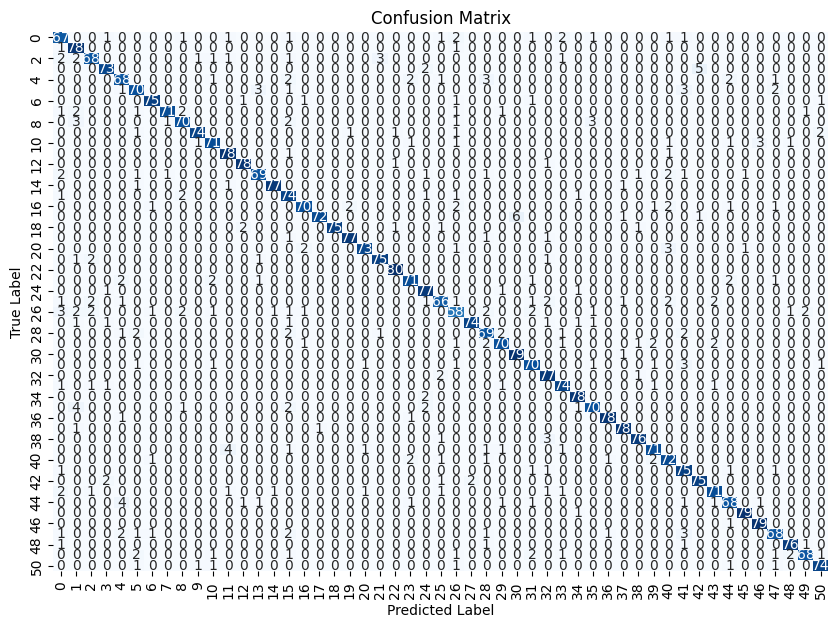

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(Y_true_classes, Y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


In [27]:
# Get the total number of instances per class (sum along the row)
totals = np.sum(conf_matrix, axis=1)

# Get the correct classifications (diagonal elements)
corrects = np.diag(conf_matrix)

# Print out the total and correct classifications for each class
for i in range(len(totals)):
    print(f"Class {i}: Total = {totals[i]}, Correct = {corrects[i]}")

Class 0: Total = 80, Correct = 67
Class 1: Total = 80, Correct = 78
Class 2: Total = 80, Correct = 68
Class 3: Total = 80, Correct = 73
Class 4: Total = 80, Correct = 68
Class 5: Total = 80, Correct = 70
Class 6: Total = 80, Correct = 75
Class 7: Total = 80, Correct = 71
Class 8: Total = 80, Correct = 70
Class 9: Total = 80, Correct = 74
Class 10: Total = 80, Correct = 71
Class 11: Total = 80, Correct = 78
Class 12: Total = 80, Correct = 78
Class 13: Total = 80, Correct = 69
Class 14: Total = 80, Correct = 77
Class 15: Total = 80, Correct = 74
Class 16: Total = 80, Correct = 70
Class 17: Total = 80, Correct = 72
Class 18: Total = 80, Correct = 75
Class 19: Total = 80, Correct = 77
Class 20: Total = 80, Correct = 73
Class 21: Total = 80, Correct = 75
Class 22: Total = 80, Correct = 80
Class 23: Total = 80, Correct = 71
Class 24: Total = 80, Correct = 77
Class 25: Total = 80, Correct = 66
Class 26: Total = 80, Correct = 58
Class 27: Total = 80, Correct = 74
Class 28: Total = 80, Correct 

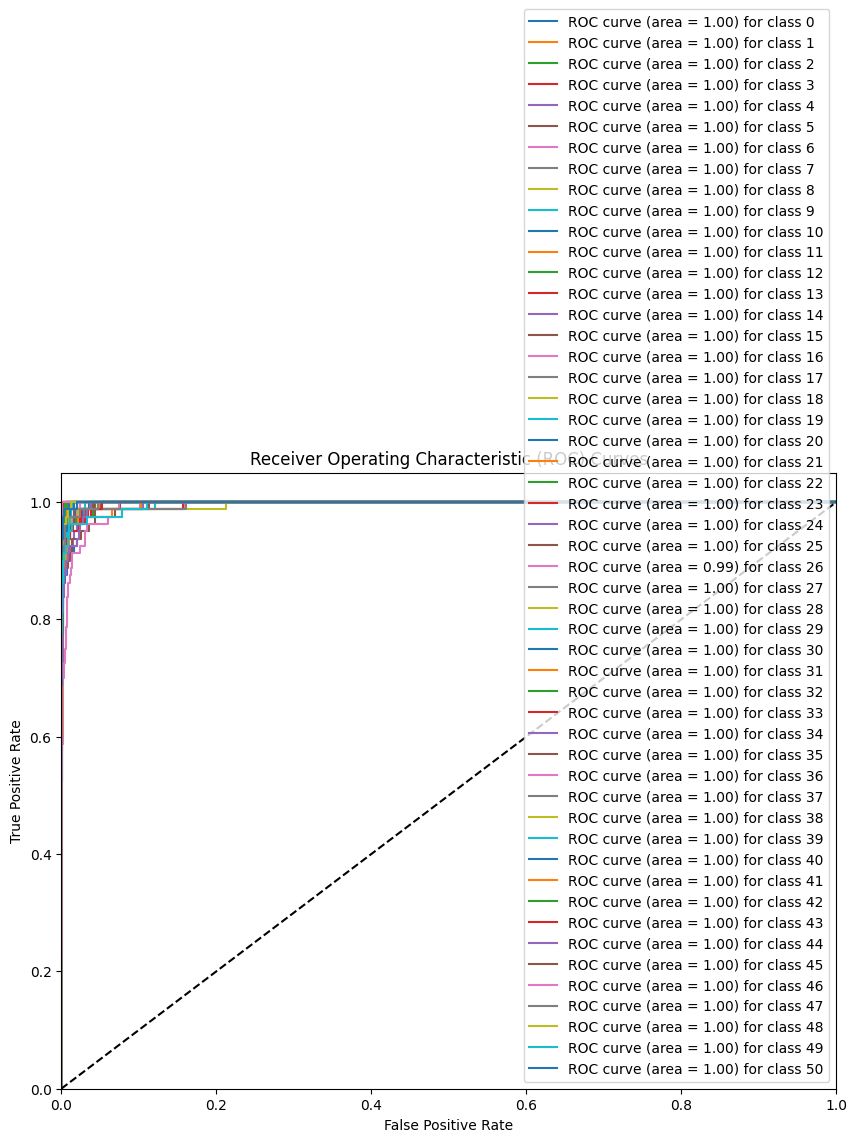

In [28]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

n_classes = Y_test.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


In [29]:
# Training accuracy
train_loss, train_accuracy = model.evaluate(X_train_scaled, Y_train, verbose=1)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Test accuracy
test_loss, test_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Check for overfitting
if train_accuracy - test_accuracy > 0.1:
    print("The model might be overfitting.")
else:
    print("The model is not overfitting.")


510/510 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.9815 - loss: 0.0595
Training Accuracy: 0.9810
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.9079 - loss: 0.3922
Test Accuracy: 0.9127
The model is not overfitting.


In [30]:
# Save the trained model to a file
model.save(f'best_neural_network_model_total.h5')
print(f'Model trained on total feature set and saved as best_neural_network_model_total.h5')

Model trained on total feature set and saved as best_neural_network_model_total.h5


In [31]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('best_neural_network_model_total.h5')

# Print the model's input shape
print(f"Model Input Shape: {model.input_shape}")  # This should now show (None, 31)


Model Input Shape: (None, 31)


In [32]:
import joblib

# Save the scaler for later use in your Flask app
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']